# Tomasz Biegus Coffee data analysis - Python

I decided to perform two analysis, one with R and another in python, because I see the python is more used in Objectivity (maybe I'm wrong about that). I decided to use R because of great tool called DALEX, which is developed exactly for this task. In Python i perform more basic analysis.

# 1. Preliminary data processing

Imports and read the data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import MinMaxScaler

In [2]:
coffee_data = pd.read_csv("coffee_data.csv")

Short looka at the data.

In [3]:
coffee_data.head()

,region,brewing_temp,coffee_amount,preinfusion,grinding_level,TDS,water_ph,plantation_height,processing_method,brewing_time,mark
0,Panama,91.1,NaN,0.0,7.0,NaN,6.67,1710.0,Honey,189.0,3
1,Panama,94.0,5.9,NaN,2.0,0.14,3.00,1530.0,Honey,95.0,3
2,Colombia,91.6,7.0,0.0,4.0,0.13,5.51,1370.0,Honey,147.0,3
3,Rwanda,92.3,NaN,0.0,4.0,0.13,7.11,1630.0,Honey,158.0,3
4,Panama,98.9,9.5,NaN,3.0,0.11,6.06,1400.0,Washed,178.0,3


Define helper function to summary the data.

In [6]:
def summary(data_frame):
    summary = pd.DataFrame(columns = ["Attribute", "%NaN", "mean", "median", "std"])
    i = 0
    for column in data_frame:
        data = data_frame[column]
        nanSum = data.isnull().sum()
        size = data.size
        nanFraction = nanSum / size
        mean = median = std = "NaN"
        if is_numeric_dtype(data):
            mean = data.mean()
            median = data.median()
            std = data.std()
        summary.loc[i] = [column, nanFraction, mean, median, std]
        i+=1
    return summary

Check out how summary function works.

In [7]:
print(summary(coffee_data))

            Attribute   %NaN      mean median        std
0              region  0.000       NaN    NaN        NaN
1        brewing_temp  0.000    91.387   91.3    2.89638
2       coffee_amount  0.132   6.98871    6.9    1.06826
3         preinfusion  0.128  0.607798      1   0.488802
4      grinding_level  0.000     4.744      5     1.4815
5                 TDS  0.198  0.119152   0.12  0.0226998
6            water_ph  0.000   6.30366  6.285    1.34444
7   plantation_height  0.000    1405.8   1400    222.307
8   processing_method  0.000       NaN    NaN        NaN
9        brewing_time  0.000    164.84    166    33.5488
10               mark  0.000     3.194      3    1.25679


Define another helper function to look at distributions of numeric arguments.

In [50]:
def plot_distributions(data_frame):
    counter = 0
    positions = [331,332,333,334,335,336,337,338,339]
    for column in data_frame:
        data = data_frame[column]
        if is_numeric_dtype(data):
            plt.subplot(positions[counter])
            data.hist()
            plt.title(column)
            counter+=1
    plt.subplots_adjust(top=1.0, bottom=0, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
    plt.show()

Look at distributions of numeric variables.

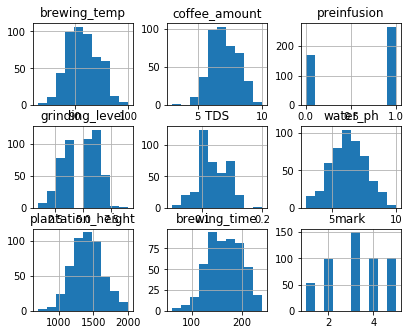

In [51]:
plot_distributions(coffee_data)

Normalization of numeric data using MinMaxScaler.

In [52]:
def normalize_numeric_data(data_frame):
    normalized_data = pd.DataFrame()
    scaler = MinMaxScaler()
    for column in data_frame:
        data = data_frame[column]
        if is_numeric_dtype(data):
            data_column = data_frame[[column]]
            null_index = data_column[column].isnull()
            data_column.loc[~null_index, [column]] = scaler.fit_transform(data_column.loc[~null_index, [column]])
            normalized_data[column] = data_column
    return normalized_data

Take a look at normalized numeric data.

In [53]:
import warnings
warnings.filterwarnings('ignore')

normalized_data = normalize_numeric_data(coffee_data)
print(normalized_data.head())

   brewing_temp  coffee_amount  preinfusion  grinding_level       TDS  \
0      0.476471            NaN          0.0           0.750       NaN   
1      0.647059       0.414286          NaN           0.125  0.600000   
2      0.505882       0.571429          0.0           0.375  0.533333   
3      0.547059            NaN          0.0           0.375  0.533333   
4      0.935294       0.928571          NaN           0.250  0.400000   

   water_ph  plantation_height  brewing_time  mark  
0  0.524286           0.776923      0.716667   0.5  
1  0.000000           0.638462      0.194444   0.5  
2  0.358571           0.515385      0.483333   0.5  
3  0.587143           0.715385      0.544444   0.5  
4  0.437143           0.538462      0.655556   0.5  


In [54]:
print(summary(normalized_data))

           Attribute   %NaN      mean    median       std
0       brewing_temp  0.000  0.493353  0.488235  0.170375
1      coffee_amount  0.132  0.569816  0.557143  0.152609
2        preinfusion  0.128  0.607798  1.000000  0.488802
3     grinding_level  0.000  0.468000  0.500000  0.185188
4                TDS  0.198  0.461014  0.466667  0.151332
5           water_ph  0.000  0.471951  0.469286  0.192063
6  plantation_height  0.000  0.542923  0.538462  0.171005
7       brewing_time  0.000  0.582444  0.588889  0.186382
8               mark  0.000  0.548500  0.500000  0.314198


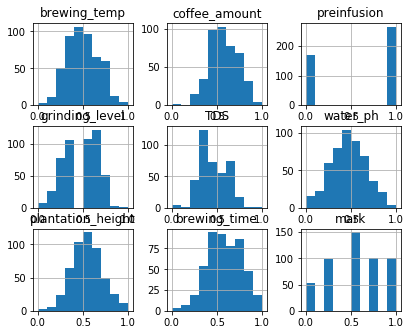

In [55]:
plot_distributions(normalized_data)

Look at whole data to recall the categorical variables.

In [56]:
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
region               500 non-null object
brewing_temp         500 non-null float64
coffee_amount        434 non-null float64
preinfusion          436 non-null float64
grinding_level       500 non-null float64
TDS                  401 non-null float64
water_ph             500 non-null float64
plantation_height    500 non-null float64
processing_method    500 non-null object
brewing_time         500 non-null float64
mark                 500 non-null int64
dtypes: float64(8), int64(1), object(2)
memory usage: 43.0+ KB


Deal with na values. We have big loss of rows caused by lots of na's in variables: preinfucion, coffee_amount and TDS. There are some techniques to deal with it for example by create regression models with those variables as an output (e.g model for input most probable values of coffee_amount where it's na, based on known values and another variables). Now I assume that lost of 20% of rows is acceptable.

In [57]:
normalized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
brewing_temp         500 non-null float64
coffee_amount        434 non-null float64
preinfusion          436 non-null float64
grinding_level       500 non-null float64
TDS                  401 non-null float64
water_ph             500 non-null float64
plantation_height    500 non-null float64
brewing_time         500 non-null float64
mark                 500 non-null float64
dtypes: float64(9)
memory usage: 35.2 KB


In [58]:
numeric_clear_data = normalized_data.dropna()

In [59]:
numeric_clear_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 2 to 499
Data columns (total 9 columns):
brewing_temp         306 non-null float64
coffee_amount        306 non-null float64
preinfusion          306 non-null float64
grinding_level       306 non-null float64
TDS                  306 non-null float64
water_ph             306 non-null float64
plantation_height    306 non-null float64
brewing_time         306 non-null float64
mark                 306 non-null float64
dtypes: float64(9)
memory usage: 23.9 KB


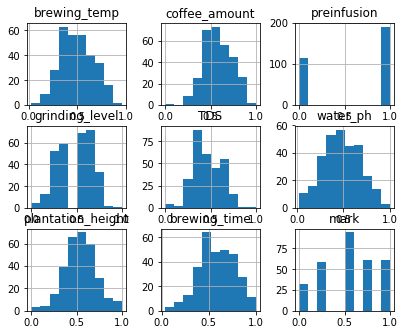

In [60]:
plot_distributions(numeric_clear_data)

# 2. Analysis of correlation between numeric variables and mark.

Calculate and plot pearson correlation coefficients between variables and response (mark).

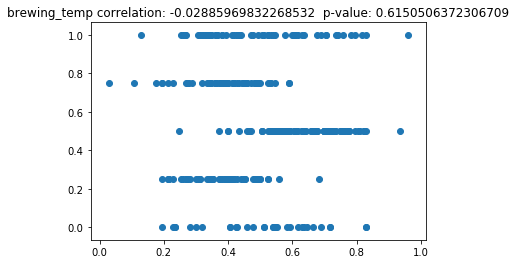

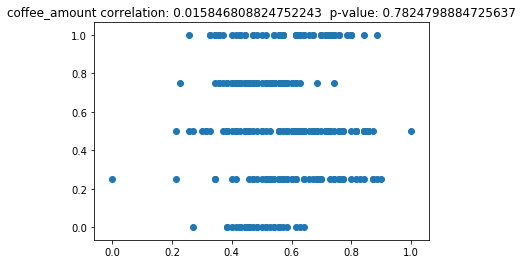

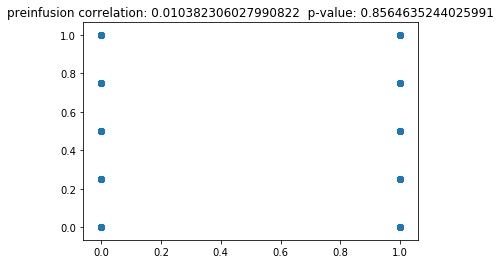

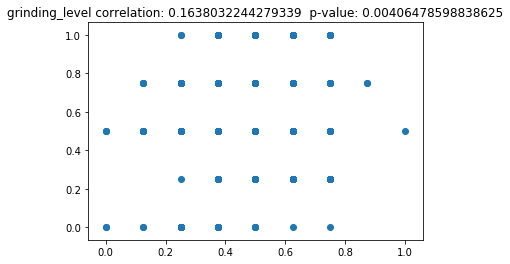

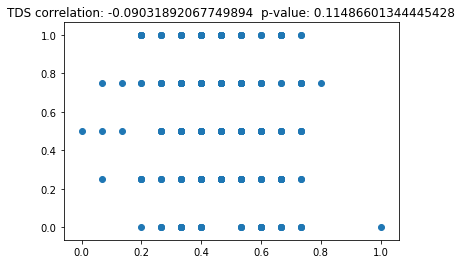

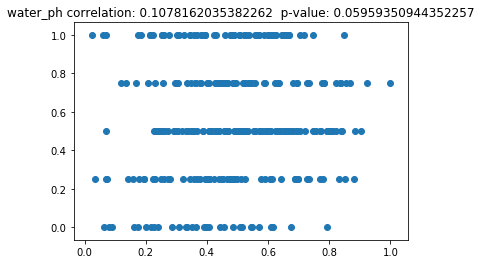

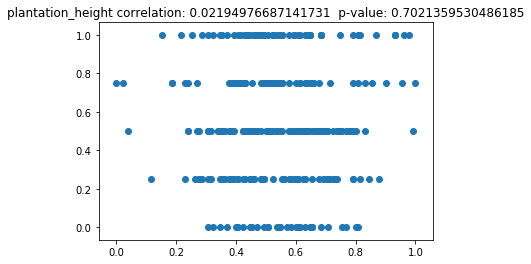

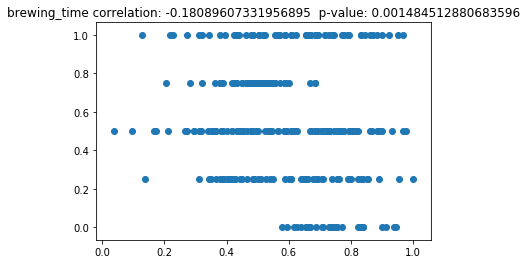

In [62]:
from scipy.stats import pearsonr

np_marks = numeric_clear_data[['mark']].values
columns = list(numeric_clear_data)
columns.remove('mark')
for column in columns:
    np_column_data = numeric_clear_data[[column]].values
    correlation = pearsonr(np_marks, np_column_data)
    plt.scatter(np_column_data, np_marks)
    title = '{} correlation: {}  p-value: {}'.format(column, correlation[0][0], correlation[1][0])
    plt.title(title)
    plt.show()

Summary of correlation coefficients for numeric features.

In [63]:
for column in columns:
    np_column_data = numeric_clear_data[[column]].values
    correlation = pearsonr(np_marks, np_column_data)
    print('{} correlation: {}  p-value: {}'.format(column, correlation[0][0], correlation[1][0]))

brewing_temp correlation: -0.02885969832268532  p-value: 0.6150506372306709
coffee_amount correlation: 0.015846808824752243  p-value: 0.7824798884725637
preinfusion correlation: 0.010382306027990822  p-value: 0.8564635244025991
grinding_level correlation: 0.1638032244279339  p-value: 0.00406478598838625
TDS correlation: -0.09031892067749894  p-value: 0.11486601344445428
water_ph correlation: 0.1078162035382262  p-value: 0.05959350944352257
plantation_height correlation: 0.02194976687141731  p-value: 0.7021359530486185
brewing_time correlation: -0.18089607331956895  p-value: 0.001484512880683596


## Summary of correlations

As we can see the strongest correlation between variable and response we have in case of brewing_time, there is negative correlation. We can also notice that second biggest correlation is for grinding_level variable. But still both correlations aren't strong.

# 3. Principal Component Analysis

Using PCA we can estimate which variables corresponds to a greatest variation in our dataset.

In [70]:
from sklearn.decomposition import PCA

data_without_marks = numeric_clear_data.drop('mark', 1)
# we exclude preinfucion because in fact it's non numeric, its boolean
data_without_marks = data_without_marks.drop('preinfusion', 1)
pca = PCA(n_components = 3)
pca.fit(data_without_marks)
print(pca.explained_variance_ratio_)
print(pca.components_[0])

[ 0.25619992  0.18701288  0.1501211 ]
[ 0.24966891 -0.34715875 -0.61016609  0.01541462  0.28473104 -0.07781754
 -0.59789517]


In [71]:
data_without_marks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 2 to 499
Data columns (total 7 columns):
brewing_temp         306 non-null float64
coffee_amount        306 non-null float64
grinding_level       306 non-null float64
TDS                  306 non-null float64
water_ph             306 non-null float64
plantation_height    306 non-null float64
brewing_time         306 non-null float64
dtypes: float64(7)
memory usage: 19.1 KB


## Summary of PCA

Principal component 1 (which explains 0.526 of variance) is linear combination of original variables, where the biggest part have third original variable which is grinding_level with coefficient = -0.61016609, second bigges part of 1st PC is brewing_time with coefficient = -0.59789517. There are some valuable informations, but doe's not include relation with output, PCA explains only contribution of variables in overall data variation.

# 4. Decision trees

Decision trees use concepts of entropy and information gain to choose order of variables in forks of generated tree. Lets take a look which variable is best for first split (at thee root of a tree) in those algorithm. It can be a clue which variable is best to describe output - mark of coffee.

First build a tree classifier.

In [75]:
from sklearn import tree

X = numeric_clear_data.drop(["mark"], 1).values
Y = numeric_clear_data[["mark"]].values


tree_clf = tree.DecisionTreeRegressor()
tree_clf = tree_clf.fit(X, Y)

type(tree_clf.tree_)

sklearn.tree._tree.Tree

Now we have to look into tree structure. Here's function to print tree classifier as a code in Python.

In [76]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print ("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

Let's use it to see how tree in build.

In [78]:
feature_names = list(numeric_clear_data.columns.values)
tree_to_code(tree_clf, feature_names)

def tree(brewing_temp, coffee_amount, preinfusion, grinding_level, TDS, water_ph, plantation_height, brewing_time, mark):
  if brewing_time <= 0.5916666984558105:
    if coffee_amount <= 0.6499999761581421:
      if grinding_level <= 0.4375:
        if water_ph <= 0.10357142984867096:
          if plantation_height <= 0.5076923370361328:
            return [[ 0.]]
          else:  # if plantation_height > 0.5076923370361328
            return [[ 0.25]]
        else:  # if water_ph > 0.10357142984867096
          if brewing_temp <= 0.5:
            if coffee_amount <= 0.2857142984867096:
              return [[ 0.25]]
            else:  # if coffee_amount > 0.2857142984867096
              if brewing_temp <= 0.4529411792755127:
                return [[ 0.75]]
              else:  # if brewing_temp > 0.4529411792755127
                if brewing_temp <= 0.46764707565307617:
                  return [[ 0.5]]
                else:  # if brewing_temp > 0.46764707565307617
                 

## Summary of decision tree approach

The most important part of generated code is:

if brewing_time <= 0.5916666984558105:
    if coffee_amount <= 0.6499999761581421:

So, decision tree classifier found that the best variables in terms of information gain are brewing_time followed by coffee_amount:



# 5. Nonnumeric (nominal and ordinal) variables

In [79]:
['region', 'preinfusion', 'processing_method']

['region', 'preinfusion', 'processing_method']

In [80]:
region_data = coffee_data[['region', 'mark']]
aggregated = region_data.groupby('region').agg(['mean', 'median', 'std', 'count']).sort_values(('mark', 'mean'), ascending=False)
aggregated

mark                       
               mean median       std count
region                                    
Guatemala  5.000000      5       NaN     1
Brazil     3.400000      3  1.140175     5
Panama     3.274809      3  1.312973   131
Rwanda     3.223301      3  1.244061   103
Ethiopia   3.214286      3  1.397276    28
Colombia   3.203704      3  1.187667    54
Kenya      3.109756      3  1.233540   164
Honduras   2.928571      3  1.206666    14

In [81]:
region_data = coffee_data[['preinfusion', 'mark']]
aggregated = region_data.groupby('preinfusion').agg(['mean', 'median', 'std', 'count']).sort_values(('mark', 'mean'), ascending=False)
aggregated

mark                       
                 mean median       std count
preinfusion                                 
1.0          3.184906      3  1.282073   265
0.0          3.134503      3  1.273962   171

In [109]:
region_data = coffee_data[['processing_method', 'mark']]
aggregated = region_data.groupby('processing_method').agg(['mean', 'median', 'std', 'count']).sort_values(('mark', 'mean'), ascending=False)
aggregated

mark                       
                       mean median       std count
processing_method                                 
Pulped Natural     3.352941      3  1.411612    17
Washed             3.232673      3  1.250004   202
Honey              3.180812      3  1.235494   271
Natural            2.500000      2  1.649916    10

# 6. Overall summary

### Numeric variables

Correlations:
Strongest correlation between variable and response we have in case of brewing_time, second biggest correlation is in case of grinding_level
    
PCA:
Based on PCA the most important variable in terms of explanation of overall variance is grinding_level followed by brewing_time

DecisionTree approach:

Decision tree classifier found that the best variables in terms of information gain are brewing_time followed by coffee_amount.

So in case of numerc attributes we can point brewing_time as most predictive feature.

### All variables

The most difficult part of analysis was comparsion between numeric and non numeric variables. First though is discretization of numeric attributes and compare all of them as nonnumeric, or compare efficiency of classifiers/regressors based sets ov variables with excluded ones one by one. I've decided to use very nice tool in R-language to perform the rest of analysis. Because R have great library to "unblackboxing" machine learning models in particular, can rank the importance of variables. So at this point i decided to end analysis, but i can continue it in python if necessary.